In [27]:
# importing necessory libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## Load dataset

In [31]:
# Load the dataset

df=pd.read_csv("C:/Users/Lenovo/Downloads/blackfriday dataset.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## Data understanding

In [37]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [39]:
df.shape

(550068, 12)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [43]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

## Data Cleaning

In [46]:
df['Product_Category_2'].fillna(0, inplace=True)
df['Product_Category_3'].fillna(0, inplace=True)
df['Stay_In_Current_City_Years'].replace({'4+': 4}, inplace=True)
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9824\2048519965.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product_Category_2'].fillna(0, inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9824\2048519965.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

## Explorartory Data Analysis


Text(0.5, 1.0, 'Distribution of Purchase Amount')

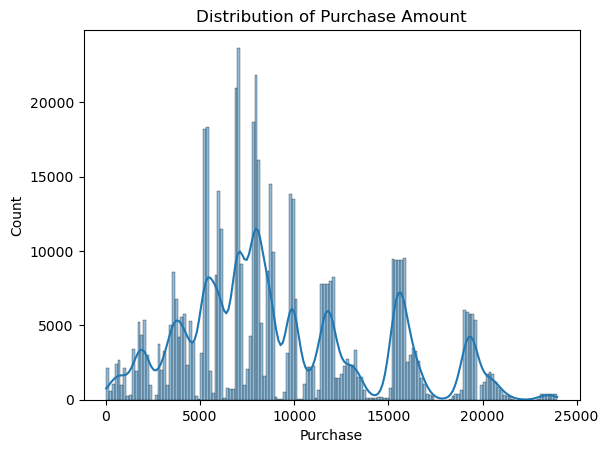

In [49]:
# target variable distribution
sns.histplot(df['Purchase'], kde=True)
plt.title("Distribution of Purchase Amount")

<Axes: xlabel='Gender', ylabel='Purchase'>

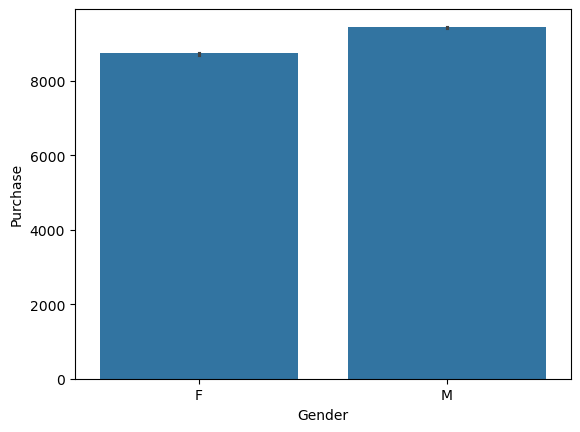

In [51]:
# purchase by gender
sns.barplot(x='Gender', y='Purchase', data=df)

<Axes: xlabel='Age', ylabel='Purchase'>

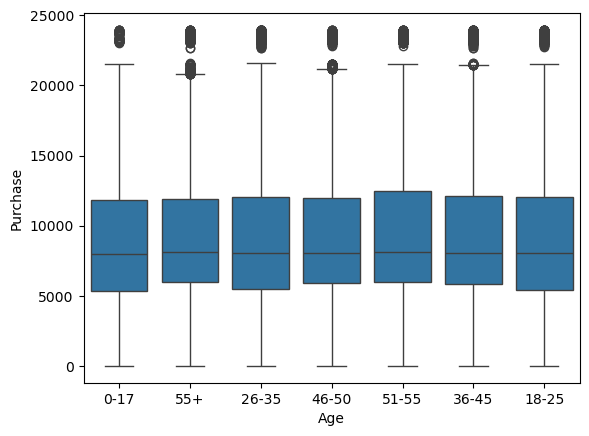

In [53]:
# Purchase by Age group
sns.boxplot(x='Age', y='Purchase', data=df)

<Axes: xlabel='Occupation', ylabel='Purchase'>

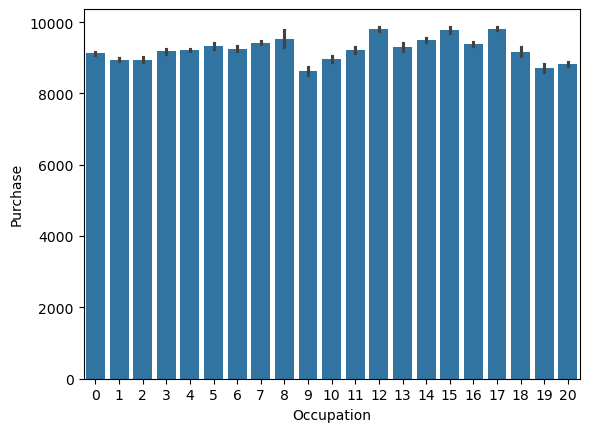

In [55]:
# Purchase by occupation
sns.barplot(x='Occupation', y='Purchase', data=df)

In [63]:
# Drop non-numeric columns
df_corr = df.select_dtypes(include=[np.number])




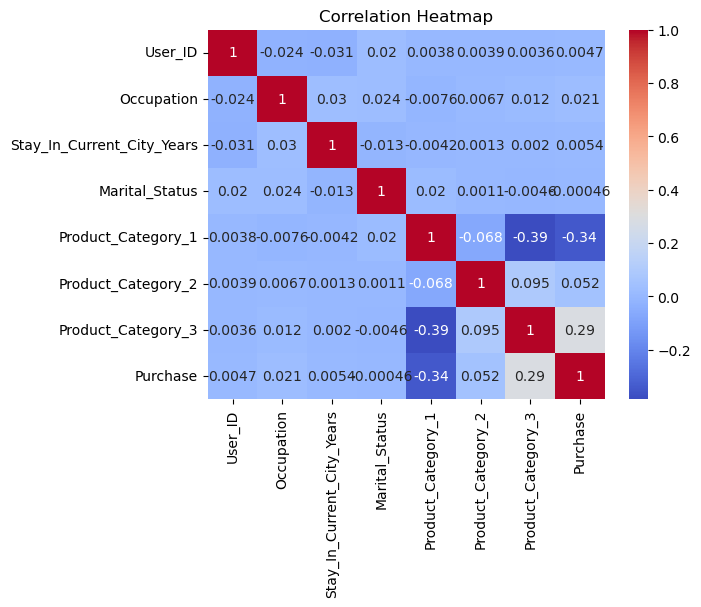

In [69]:
#Plot Heatmap
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()